In [35]:
import pandas as pd

data = pd.read_excel('files_for_lab/excel_files/marketing_customer_analysis.xlsx', engine="openpyxl")

In [36]:
data.head(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [37]:
data.shape

(9134, 24)

In [38]:
#reindex + standar

cols = []
for colname in data.columns:
    cols.append(colname.lower())
    
data.columns = cols

data = data.rename(columns={'customer lifetime value':'customer_lifetime_value',
       'effective to date':'effective_to_date','location code':'location_code',
       'marital status':'marital_status', 'monthly premium auto':'monthly_premium_auto', 'months since last claim':'months_since_last_claim',
       'months since policy inception':'months_since_policy_inception', 'number of open complaints':'number_of_open_complaints',
       'number of policies':'number_of_policies', 'policy type':'policy_type', 'renew offer type':'renew_offer_type',
       'sales channel':'sales_channel', 'total claim amount':'total_claim_amount', 'vehicle class':'vehicle_class', 'vehicle size':'vehicle_size',
       'vehicle type':'vehicle_type'})
#
data = data.drop([data.columns[0]], axis=1)
data.head()


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [39]:
data.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [40]:
data._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [41]:
data.select_dtypes(['object'])

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [42]:
data = data.drop_duplicates() #droping duplicates to have a better overview
data.shape

(8971, 23)

In [43]:
data.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [44]:
data.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [45]:
#droping vehicle type since 50% of the data is null
data = data.drop([data.columns[-1]], axis=1)
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car


In [46]:
display(data['state'].unique())

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [47]:
#since policy and policy type are the same
data = data.drop([data.columns[-6]], axis=1)
data.head(2)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,69,32,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,94,13,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car


In [48]:
#the responsed does not look relevant
#data = data.drop([data.columns[-8]], axis=1)
#data.head(2)

In [49]:
#translatin' data to dates 
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
display(data.head())
print(data.dtypes)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,69,32,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,94,13,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,108,18,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,106,18,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,73,12,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car


state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      float64
vehicle_class                           

In [50]:
# filter by single year
df_filtered = data[data['effective_to_date'].dt.strftime('%Y') == '2011']
df_filtered.shape

(8971, 21)

In [51]:

data.select_dtypes(['datetime64[ns]'])

,effective_to_date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-02-03
...,...
9128,2011-01-06
9129,2011-02-10
9131,2011-02-06
9132,2011-02-03


In [52]:
#first-quarter filtered
df_filtered = data[data['effective_to_date'].dt.strftime('%Y-%m') < '2011-04']
df_filtered.head(2)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,69,32,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,94,13,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car


In [53]:
#debating on clearing the NaNs or replacing them
display(data['vehicle_class'].unique())

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [54]:
display(data['vehicle_class'].mode())

0    Four-Door Car
Name: vehicle_class, dtype: object

In [55]:
#debating on clearing the NaNs or replacing them
#display(data['vehicle_size'].unique())
#display(data['vehicle_size'].mode())

In [56]:
#LAB 3 begins here

In [57]:
data.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      float64
vehicle_class                           

In [58]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,8971.0,8004.192319,6867.941039,1898.007675,3999.49770,5792.439588,8954.637109,83325.381190
income,8971.0,37644.828113,30431.741597,0.000000,0.00000,33947.000000,62365.500000,99981.000000
monthly_premium_auto,8971.0,93.192621,34.358960,61.000000,68.00000,83.000000,109.000000,298.000000
months_since_last_claim,8971.0,15.099209,10.077668,0.000000,6.00000,14.000000,23.000000,35.000000
months_since_policy_inception,8971.0,48.054175,27.916442,0.000000,24.00000,48.000000,71.000000,99.000000
number_of_open_complaints,8971.0,0.385241,0.909666,0.000000,0.00000,0.000000,0.000000,5.000000
number_of_policies,8971.0,2.970349,2.391832,1.000000,1.00000,2.000000,4.000000,9.000000
total_claim_amount,8971.0,433.886437,291.074428,0.099007,270.47269,383.442328,547.988754,2893.239678


In [59]:
data.describe(include='all').T

/var/folders/9w/sc50fcc10kn5s181xfyx15080000gp/T/ipykernel_4642/3536075253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
state,8971,5,California,3081,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_lifetime_value,8971.0,NaN,NaN,NaN,NaT,NaT,8004.192319,6867.941039,1898.007675,3999.4977,5792.439588,8954.637109,83325.38119
response,8971,2,No,7826,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,8971,3,Basic,5469,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,8971,5,Bachelor,2704,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective_to_date,8971,59,2011-01-27 00:00:00,191,2011-01-01,2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,8971,5,Employed,5604,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,8971,2,F,4579,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,8971.0,NaN,NaN,NaN,NaT,NaT,37644.828113,30431.741597,0.0,0.0,33947.0,62365.5,99981.0
location_code,8971,3,Suburban,5656,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy',
       'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class'],
      dtype='object')

In [61]:
import seaborn as sns

y = data['response'].value_counts()

No     7826
Yes    1145
Name: response, dtype: int64

<AxesSubplot:>

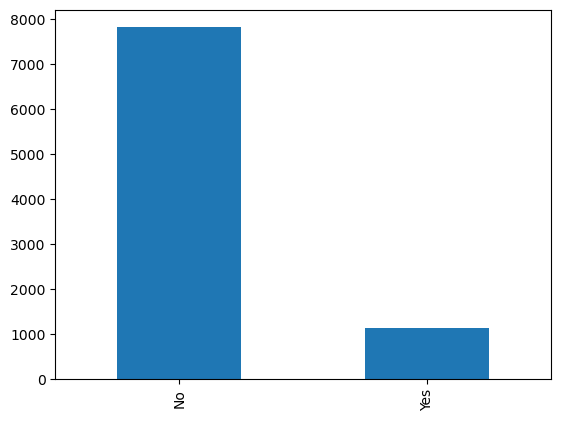

In [62]:
#Show a plot of the total number of responses.
data['response'].value_counts().plot(kind='bar')

In [73]:
x = data['sales_channel'].value_counts()

Agent          3394
Branch         2534
Call Center    1737
Web            1306
Name: sales_channel, dtype: int64

In [97]:
new = data.filter(['sales_channel','response'], axis=1)
new.head()

,sales_channel,response
0,Agent,No
1,Agent,No
2,Agent,No
3,Call Center,No
4,Agent,No
